# Nama : Muhammad Nawawi

# Nim    : 09011381722104

# SK5  Artificial Intelligence


# Smart Traffic Light Menggunakan Image Processing dan Metode Fuzzy Logic Mamdani


Lampu lalu lintas merupakan infrastruktur penting untuk mencegah kemacetan jalan di indonesia. Kemacetan lalu lintas bisa menyebabkan peningkatan biaya dikarenakan waktu yang terbuang percuma dan konsumsi bahan bakar yang lebih banyak. Selain itu dapat menciptakan masalah penting lainnya, contohya jika ada ambulan dengan membawa pasien yang kritis maka ada kemungkinan besar bahwa pasien tidak dapat mencapai rumah sakit tepat waktu jika terjebak kemacetan. Untuk itu, sangat penting merancang suatu sistem lalu lintas yang cerdas yang dapat mengatur laju lalu lintas untuk menghindari kecelakaan, tabrakan dan kemacetan. Untuk menghitung kepadatan berdasarkan jumlah objek kendaraan yang telah terdeteksi adalah Metode fuzzy logic mamdani.

    

    

Deklarasi fungsi yang digunakan yaitu :
    - numpy untuk operasi vektor dan matriks
    - skfuzzy untuk mencari nilai terbaik
    - matplotlib.pyplot untuk menampilkan gambar dan grafik, Matplotlib membantu kita untuk memvisualisasikan data dengan lebih  rapi. Ada plot untuk menampilkan data secara 2D atau 3D. Sehingga dapat menampilkan data yang telah diolah sesuai kebutuhan.

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Fuzifikasi 

Data yang dikumpulkan memiliki 2 input dan 1 output

input :
    - barat timur
    - uatar selatan
output :
    - waktu
    

Sebelum memulai, kita harus memasukkan data dan range terlebih dahulu seprti dibawah ini.

In [3]:
barat_timur = ctrl.Antecedent(np.arange(0, 8, 0.5), 'barat_timur')
utara_selatan = ctrl.Antecedent(np.arange(0, 8, 0.5), 'utara_selatan')
waktu = ctrl.Consequent(np.arange(60, 200, 0.5), 'waktu')

Pada bagian ini hanya untuk plotting atau menampilkan grafik

In [4]:
BaratTimur_x = np.arange(0, 8, 0.5)
UtaraSelatan_x = np.arange(0, 8, 0.5)
Waktu_x = np.arange(60, 200, 0.5)

# Fungsi Keanggotaan 

### Barat Timur 
Untuk mendeteksi, proses ini menggunakan fungsi keanggotaan trapesium

Dari masing-masing input mempunyai 3 himpunan keanggotaan, yaitu:
    - Senggang (s)
    - Normal (n)
    - Padat (p)
Membership function yang digunakan bernilai antara 0 - 8.
Nilai Membership function dari Barat Timur yaitu :
    - senggang : 0 - 3
    - normal   : 1 - 6
    - padat    : 4 - 8
    

In [5]:
barat_timur['senggang'] = fuzz.trapmf(barat_timur.universe, [0, 0, 1, 3])
barat_timur['normal'] = fuzz.trapmf(barat_timur.universe, [ 1, 3, 4, 6])
barat_timur['padat'] = fuzz.trapmf(barat_timur.universe, [ 4, 6, 8, 8])

#### Fungsi keanggotaan
    - Barat Timur Senggang

\begin{equation}
  Barat Timur['senggang'] = \mu Barat TimurSenggang(x)=\begin{cases}
    1, & \text{$0\leq x\leq1$}.\\
    (3 - x)/(3 - 1) , & \text{$1 \leq x \leq 3$}.\\
    0, & \text{$x\geq 3$}.
  \end{cases}
 \end{equation}

Text(0.5,1,'BaratTimur Senggang')

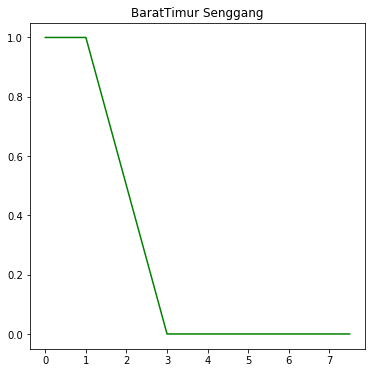

In [35]:
BaratTimur_senggang = fuzz.trapmf(BaratTimur_x,[0, 0, 1, 3])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(BaratTimur_x,BaratTimur_senggang,'green')
ax0.set_title('BaratTimur Senggang')

    - Barat Timur Normal

\begin{equation}
 Barat Timur['normal'] = \mu BaratTimurNormal(x)=\begin{cases}
    1, & \text{$3\leq  x \leq4$}.\\
    (x - 1)/(3 - 1) , & \text{$1 \leq x \leq 3$}.\\
    (6 - x)/(6 - 4) , & \text{$4 \leq x \leq 6$}.\\
    0, & \text{$x\leq1$ atau $x\geq 6$}.\\
  \end{cases}
 \end{equation}

Text(0.5,1,'BaratTimur Normal')

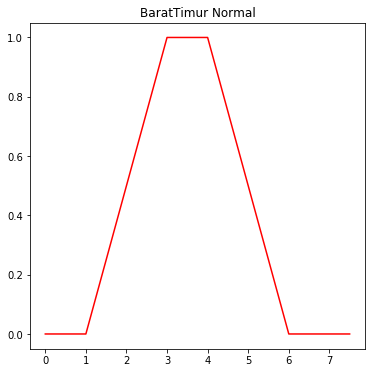

In [7]:
BaratTimur_Normal = fuzz.trapmf(BaratTimur_x,[1, 3, 4, 6])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(BaratTimur_x,BaratTimur_Normal,'red')
ax0.set_title('BaratTimur Normal')

    - Barat Timur Padat

\begin{equation}
 Barat Timur['padat'] = \mu BaratTimurPadat(x)=\begin{cases}
    0, & \text{$x\leq 4$}.\\
    (x - 4)/(6 - 4) , & \text{$4 \leq x \leq 6$}.\\
    1, & \text{$x\geq 6$}.
  \end{cases}
 \end{equation}

Text(0.5,1,'BaratTimur Padat')

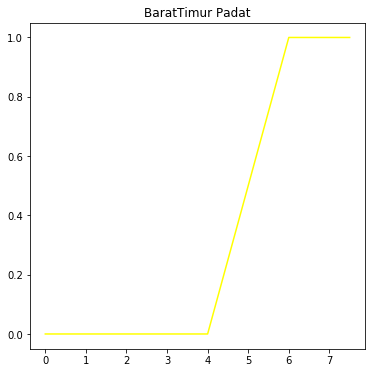

In [8]:
BaratTimur_Padat = fuzz.trapmf(BaratTimur_x,[4, 6, 8, 8])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(BaratTimur_x,BaratTimur_Padat,'yellow')
ax0.set_title('BaratTimur Padat')

    - Plotting keseluruhan
Gabungan dari 3 himpunan

Dengan fungsi keanggotaan

\begin{equation}
  Barat Timur['senggang'] = \mu BaratTimurSenggang(x)=\begin{cases}
    1, & \text{$0\leq x\leq1$}.\\
    (3 - x)/(3 - 1) , & \text{$1 \leq x \leq 3$}.\\
    0, & \text{$x\geq 3$}.
  \end{cases}
  \\
  Barat Timur['normal'] = \mu BaratTimurNormal(x)=\begin{cases}
    1, & \text{$3\leq  x \leq4$}.\\
    (x - 1)/(3 - 1) , & \text{$1 \leq x \leq 3$}.\\
    (6 - x)/(6 - 4) , & \text{$4 \leq x \leq 6$}.\\
    0, & \text{$x\leq1$ atau $x\geq 6$}.\\
  \end{cases}
  \\
  Barat Timur['padat'] = \mu BaratTimurPadat(x)=\begin{cases}
    0, & \text{$x\leq 4$}.\\
    (x - 4)/(6 - 4) , & \text{$4 \leq x \leq 6$}.\\
    1, & \text{$x\geq 6$}.
  \end{cases}
\end{equation}

Pada gabungan inputan Barat Timur bisa kita lihat bahwa :
    - Senggang dengan grafik warna biru yang dimulai dari 0 - 3
    - Normal dengan grafik warna orange yang dimulai dari 1 - 6
    - Padat dengan grafik warna green yang dimulai dari 4 - 8

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


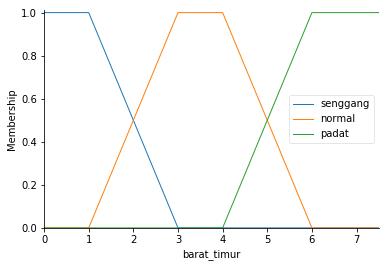

In [9]:
barat_timur.view()

### Utara Selatan 
Untuk mendeteksi, proses ini menggunakan fungsi keanggotaan trapesium

Dari masing-masing input mempunyai 3 himpunan keanggotaan, yaitu:
    - Senggang (s)
    - Normal (n)
    - Padat (p)
Membership function yang digunakan bernilai antara 0 - 8.
Nilai Membership function dari Utara Selatan yaitu :
    - senggang : 0 - 3
    - normal   : 1 - 6
    - padat    : 4 - 8
    

In [10]:
utara_selatan['senggang'] = fuzz.trapmf(utara_selatan.universe, [0, 0, 1, 3])
utara_selatan['normal'] = fuzz.trapmf(utara_selatan.universe, [ 1, 3, 4, 6])
utara_selatan['padat'] = fuzz.trapmf(utara_selatan.universe, [ 4, 6, 8, 8])

#### Fungsi keanggotaan
    - Utara Selatan Senggang

\begin{equation}
  Utara Selatan['senggang'] = \mu UtaraSelatanSenggang(x)=\begin{cases}
    1, & \text{$0\leq x\leq1$}.\\
    (3 - x)/(3 - 1) , & \text{$1 \leq x \leq 3$}.\\
    0, & \text{$x\geq 3$}.
  \end{cases}
 \end{equation}

Text(0.5,1,'UataraSelatan Senggang')

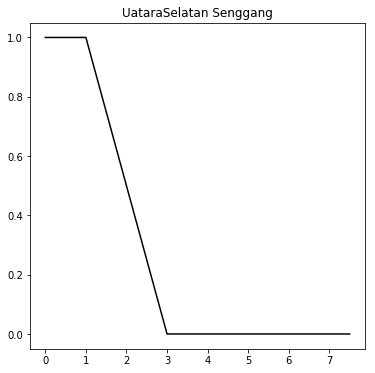

In [11]:
UtaraSelatan_senggang = fuzz.trapmf(UtaraSelatan_x,[0, 0, 1, 3])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(UtaraSelatan_x,UtaraSelatan_senggang,'black')
ax0.set_title('UataraSelatan Senggang')

    - Utara Selatan Normal

\begin{equation}
Utara Selatan['normal'] = \mu UtaraSelatanNormal(x)=\begin{cases}
    1, & \text{$3\leq  x \leq4$}.\\
    (x - 1)/(3 - 1) , & \text{$1 \leq x \leq 3$}.\\
    (6 - x)/(6 - 4) , & \text{$4 \leq x \leq 6$}.\\
    0, & \text{$x\leq1$ atau $x\geq 6$}.\\
  \end{cases}
\end{equation}

Text(0.5,1,'UataraSelatan Normal')

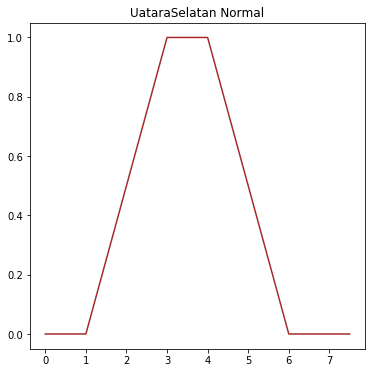

In [12]:
UtaraSelatan_normal = fuzz.trapmf(UtaraSelatan_x,[1, 3, 4, 6])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(UtaraSelatan_x,UtaraSelatan_normal,'brown')
ax0.set_title('UataraSelatan Normal')

    - Utara Selatan Padat

\begin{equation}
  Utara Selatan['padat'] = \mu UtaraSelatanPadat(x)=\begin{cases}
    0, & \text{$x\leq 4$}.\\
    (x - 4)/(6 - 4) , & \text{$4 \leq x \leq 6$}.\\
    1, & \text{$x\geq 6$}.
  \end{cases}
\end{equation}

Text(0.5,1,'UataraSelatan Padat')

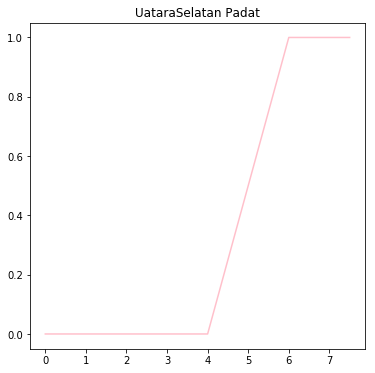

In [13]:
UtaraSelatan_padat = fuzz.trapmf(UtaraSelatan_x,[4, 6, 8, 8])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(UtaraSelatan_x,UtaraSelatan_padat,'pink')
ax0.set_title('UataraSelatan Padat')

    - Plotting keseluruhan
Gabungan dari 3 himpunan

Dengan fungsi keanggotaan

\begin{equation}
  Utara Selatan['senggang'] = \mu UtaraSelatanSenggang(x)=\begin{cases}
    1, & \text{$0\leq x\leq1$}.\\
    (3 - x)/(3 - 1) , & \text{$1 \leq x \leq 3$}.\\
    0, & \text{$x\geq 3$}.
  \end{cases}
  \\
  Utara Selatan['normal'] = \mu UtaraSelatanNormal(x)=\begin{cases}
    1, & \text{$3\leq  x \leq4$}.\\
    (x - 1)/(3 - 1) , & \text{$1 \leq x \leq 3$}.\\
    (6 - x)/(6 - 4) , & \text{$4 \leq x \leq 6$}.\\
    0, & \text{$x\leq1$ atau $x\geq 6$}.\\
  \end{cases}
  \\
  Utara Selatan['padat'] = \mu UtaraSelatanPadat(x)=\begin{cases}
    0, & \text{$x\leq 4$}.\\
    (x - 4)/(6 - 4) , & \text{$4 \leq x \leq 6$}.\\
    1, & \text{$x\geq 6$}.
  \end{cases}
\end{equation}

Pada gabungan inputan Utara Selatan bisa kita lihat bahwa :
    - Senggang dengan grafik warna biru yang dimulai dari 0 - 3
    - Normal dengan grafik warna orange yang dimulai dari 1 - 6
    - Padat dengan grafik warna green yang dimulai dari 4 - 8

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


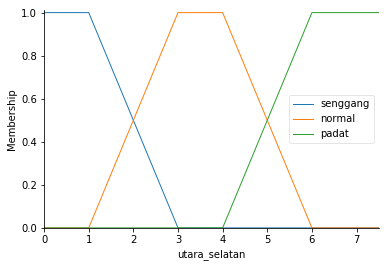

In [14]:
utara_selatan.view()

### Waktu
Untuk mendeteksi, proses ini menggunakan fungsi keanggotaan segi tiga

Dari masing-masing input mempunyai 3 himpunan keanggotaan, yaitu:
    - Cepat (c)
    - Normal (n)
    - Lama (l)
Membership function yang digunakan bernilai antara 60 - 180.
Nilai Membership function dari waktu yaitu :
    - cepat    : 60 - 120
    - normal   : 80 - 160
    - lama     : 120 - 180
    

In [15]:
waktu['cepat'] = fuzz.trimf(waktu.universe, [60, 80, 120])
waktu['normal'] = fuzz.trimf(waktu.universe, [ 80, 120, 160])
waktu['lama'] = fuzz.trimf(waktu.universe, [ 120, 160, 180])

#### Fungsi keanggotaan
    - Waktu Cepat

\begin{equation}
  Waktu['cepat'] = \mu WaktuCepat(x)=\begin{cases}
    0, & \text{$x\leq60$ atau $x\geq120$}.\\
    (x - 60)/(80 - 60) , & \text{$60 \leq x \leq 80$}.\\
    ( 120 - x ) / (120 - 80), & \text{$80 \leq x \leq 120$}.\\
  \end{cases}
\end{equation}

Text(0.5,1,'Waktu Cepat')

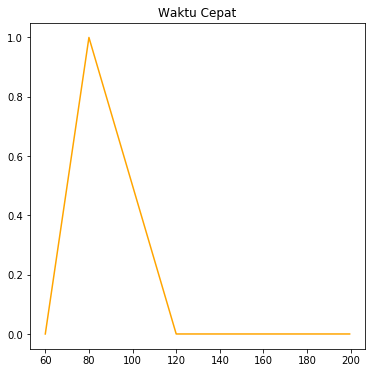

In [16]:
Waktu_Cepat = fuzz.trimf(Waktu_x,[60, 80, 120])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(Waktu_x,Waktu_Cepat,'orange')
ax0.set_title('Waktu Cepat')

    - Waktu Normal

\begin{equation}
 Waktu['normal'] = \mu WaktuNormal(x)=\begin{cases}
    0, & \text{$x\leq80$ atau $x\geq160$}.\\
    (x - 80)/(120 - 80) , & \text{$80 \leq x \leq 120$}.\\
    (160 - x ) / (160 - 120), & \text{$120 \leq x \leq 160$}.\\
  \end{cases}
\end{equation}

Text(0.5,1,'Waktu Normal')

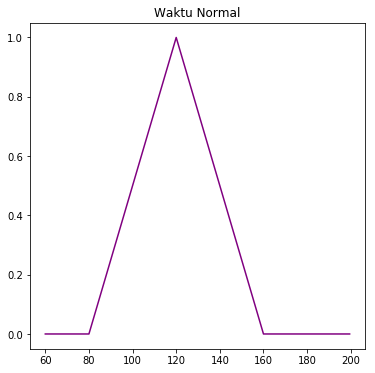

In [17]:
Waktu_Normal = fuzz.trimf(Waktu_x,[80, 120, 160])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(Waktu_x,Waktu_Normal,'purple')
ax0.set_title('Waktu Normal')

    - Waktu Lama

\begin{equation}
 Waktu['lama'] = \mu WaktuLama(x)=\begin{cases}
    0, & \text{$x\leq120$ atau $x\geq180$}.\\
    (x - 120)/(160 - 120) , & \text{$120 \leq x \leq 160$}.\\
    (180 - x ) / (180 - 160), & \text{$160 \leq x \leq 180$}.\\
  \end{cases}
\end{equation}

Text(0.5,1,'Waktu Lama')

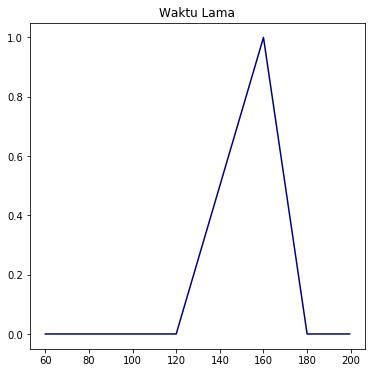

In [18]:
Waktu_Lama = fuzz.trimf(Waktu_x,[120, 160, 180])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(Waktu_x,Waktu_Lama,'navy')
ax0.set_title('Waktu Lama')

    - Plotting keseluruhan
Gabungan dari 3 himpunan

Dengan fungsi keanggotaan

\begin{equation}
  Waktu['cepat'] = \mu WaktuCepat(x)=\begin{cases}
    0, & \text{$x\leq60$ atau $x\geq120$}.\\
    (x - 60)/(80 - 60) , & \text{$60 \leq x \leq 80$}.\\
    ( 120 - x ) / (120 - 80), & \text{$80 \leq x \leq 120$}.\\
  \end{cases}
  \\
  Waktu['normal'] = \mu WaktuNormal(x)=\begin{cases}
    0, & \text{$x\leq80$ atau $x\geq160$}.\\
    (x - 80)/(120 - 80) , & \text{$80 \leq x \leq 120$}.\\
    (160 - x ) / (160 - 120), & \text{$120 \leq x \leq 160$}.\\
  \end{cases}
  \\
  Waktu['lama'] = \mu WaktuLama(x)=\begin{cases}
    0, & \text{$x\leq120$ atau $x\geq180$}.\\
    (x - 120)/(160 - 120) , & \text{$120 \leq x \leq 160$}.\\
    (180 - x ) / (180 - 160), & \text{$160 \leq x \leq 180$}.\\
  \end{cases}
\end{equation}

Pada gabungan inputan Waktu bisa kita lihat bahwa :
    - Cepat dengan grafik warna biru yang dimulai dari 60 - 120
    - Normal dengan grafik warna orange yang dimulai dari 80 - 160
    - Lama dengan grafik warna green yang dimulai dari 120 - 180

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


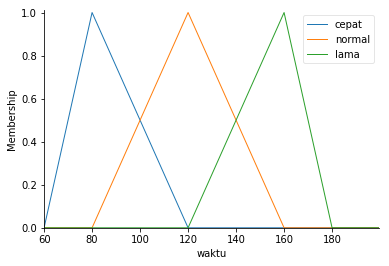

In [19]:
waktu.view()

# Inferencing 


Pada tahap inferencing, dengan membuat aturan-aturan fuzzy yang dinyatakan dalam bentuk IF (jika)  .... THEN (maka)  ....

Pada sistem ini berdasarkan jumlah fuzzifikasi dari variabel BT yang berjumlah 3 dan fuzzifikasi dari variabel US yang berjumlah 3, maka rule yang dibuat berjumlah 3 pangkat 2  (3 x 3 = 9 rule)

1. IF Barat Timur Senggang dan Utara Selatan Senggang THEN Waktu Cepat
2. IF Barat Timur Normal dan Utara Selatan Senggang THEN Waktu Cepat
3. IF Barat Timur Padat dan Utara Selatan Senggang THEN Waktu Normal
4. IF Barat Timur Senggang dan Utara Selatan Normal THEN Waktu Cepat
5. IF Barat Timur Normal dan Utara Selatan Normal THEN Waktu Normal
6. IF Barat Timur Padat dan Utara Selatan Normal THEN Waktu Lama
7. IF Barat Timur Senggang dan Utara Selatan Padat THEN Waktu Normal
8. IF Barat Timur Normal dan Utara Selatan Padat THEN Waktu Lama
9. IF Barat Timur Padat dan Utara Selatan Padat THEN Waktu Lama

|Rule|Barat Timur|Utara Selatan|Waktu|
|----|------------|---------|-----|
|Rule1|Senggang|Senggang|Cepat|
|Rule2|Normal|Senggang|Cepat|
|Rule3|Padat|Senggang|Normal|
|Rule4|Senggang|Normal|Cepat|
|Rule5|Normal|Normal|Normal|
|Rule6|Padat|Normal|Lama|
|Rule7|Senggang|Padat|Normal|
|Rule8|Normal|Padat|Lama|
|Rule9|Padat|Padat|Lama|

In [20]:
rule1 = ctrl.Rule(barat_timur['senggang'] & utara_selatan['senggang'], waktu['cepat'])
rule2 = ctrl.Rule(barat_timur['normal'] & utara_selatan['senggang'], waktu['cepat'])
rule3 = ctrl.Rule(barat_timur['padat'] & utara_selatan['senggang'], waktu['normal'])
rule4 = ctrl.Rule(barat_timur['senggang'] & utara_selatan['normal'], waktu['cepat'])
rule5 = ctrl.Rule(barat_timur['normal'] & utara_selatan['normal'], waktu['normal'])
rule6 = ctrl.Rule(barat_timur['padat'] & utara_selatan['normal'], waktu['lama'])
rule7 = ctrl.Rule(barat_timur['senggang'] & utara_selatan['padat'], waktu['normal'])
rule8 = ctrl.Rule(barat_timur['normal'] & utara_selatan['padat'], waktu['lama'])
rule9 = ctrl.Rule(barat_timur['padat'] & utara_selatan['padat'], waktu['lama'])

# RULE 

In [21]:
brake_ctrl = ctrl.ControlSystem(
    [rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])

# DEFUZZIFIKASI 

Percobaan dengan memasukkan nilai input barat_timur = 5 dan utara_selatan 8

In [33]:
braking = ctrl.ControlSystemSimulation(brake_ctrl)

braking.input['barat_timur'] = 5
braking.input['utara_selatan'] = 8

braking.compute()

Melakukan perhitungan defuzzifikasi

152.2222222222223


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


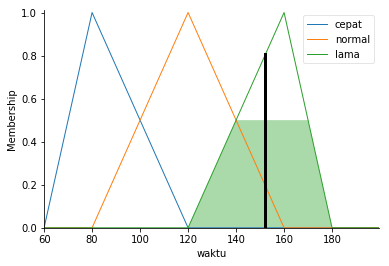

In [34]:
print(braking.output['waktu'])

waktu.view(sim=braking)

plt.show()

Dari data yang kita masukkan didapatkan hasil output seperti diatas.
Dengan Hasilnya lama dan waktu 152.2 detik

Tampilan dari rulenya

In [24]:
rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9.view

(IF barat_timur[senggang] AND utara_selatan[senggang] THEN waktu[cepat]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF barat_timur[normal] AND utara_selatan[senggang] THEN waktu[cepat]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF barat_timur[padat] AND utara_selatan[senggang] THEN waktu[normal]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF barat_timur[senggang] AND utara_selatan[normal] THEN waktu[cepat]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF barat_timur[normal] AND utara_selatan[normal] THEN waktu[normal]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF barat_timur[padat] AND utara_selatan[normal] THEN waktu[lama]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF barat_timur[senggang] AND utara_selatan[padat] THEN waktu[normal]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF barat_timur[normal] AND ut

# Hitungan Manual 

\begin{equation}
    Barat Timur = 5 \\
    Masukkan\,nilai\,baratTimur\,ke\,dalam\,masing-masing\,fungsi\,keanggotaan\,BaratTimur\\
  Barat Timur['senggang'] = \mu BaratTimurSenggang(x)=\begin{cases}
    1, & \text{$0\leq x\leq1$}.\\
    (3 - x)/(3 - 1) , & \text{$1 \leq x \leq 3$}.\\
    0, & \text{$x\geq 3$}.\checkmark\\
  \end{cases}
  \\
  Barat Timur['normal'] = \mu BaratTimurNormal(x)=\begin{cases}
    1, & \text{$3\leq  x \leq4$}.\\
    (x - 1)/(3 - 1) , & \text{$1 \leq x \leq 3$}.\\
    (6 - x)/(6 - 4) , & \text{$4 \leq x \leq 6$}.\checkmark\\
    0, & \text{$x\leq1$ atau $x\geq 6$}.\\
  \end{cases}
  \\
  Barat Timur['padat'] = \mu BaratTimurPadat(x)=\begin{cases}
    0, & \text{$x\leq 4$}.\\
    (x - 4)/(6 - 4) , & \text{$4 \leq x \leq 6$}.\checkmark\\
    1, & \text{$x\geq 6$}.
  \end{cases}
\end{equation}

\begin{equation}
    \mu BaratTimurNormal (5) = (6−5)/(6−4) \\
    \mu BaratTimurNormal(5) = 1/2 \\ 
    \mu BaratTimurNormal(5) = 0.5 \\
    \mu BaratTimurPadat(5) = (5−4)/(6−4) \\
    \mu BaratTimurPadat(5) = 1/2 \\ 
    \mu BaratTimurPadat(5) = 0.5 \\
\end{equation}

\begin{equation}
 Utara Selatan = 8 \\
    Masukkan\,nilai\,utaraselatan\,ke\,dalam\,masing-masing\,fungsi\,keanggotaan\,UtaraSelatan\\
  Utara Selatan['senggang'] = \mu UtaraSelatanSenggang(x)=\begin{cases}
    1, & \text{$0\leq x\leq1$}.\\
    (3 - x)/(3 - 1) , & \text{$1 \leq x \leq 3$}.\\
    0, & \text{$x\geq 3$}.\checkmark\\
  \end{cases}
  \\
  Utara Selatan['normal'] = \mu UtaraSelatanNormal(x)=\begin{cases}
    1, & \text{$3\leq  x \leq4$}.\\
    (x - 1)/(3 - 1) , & \text{$1 \leq x \leq 3$}.\\
    (6 - x)/(6 - 4) , & \text{$4 \leq x \leq 6$}.\\
    0, & \text{$x\leq1$ atau $x\geq 6$}.\checkmark\\
  \end{cases}
  \\
  Utara Selatan['padat'] = \mu UtaraSelatanPadat(x)=\begin{cases}
    0, & \text{$x\leq 4$}.\\
    (x - 4)/(6 - 4) , & \text{$4 \leq x \leq 6$}.\\
    1, & \text{$x\geq 6$}.\checkmark\\
  \end{cases}
\end{equation}

\begin{equation}
    \mu UtaraSelatanPadat(8) = 1 \\
\end{equation}

Lalu kita cari nilai z untuk setiap aturan dengan menggunakan fungsi MIN karena menggunakan rule AND


1 if (BaratTimur is Senggang) and (UtaraSelatan is Senggang) then (Jumlah Waktu is Cepat) 


$$ \\ \alpha(predikat_1) = \mu BaratTimurSenggang \cap \mu UtaraSelatanSenggang $$
$$\alpha(predikat_1)   = min (\mu BaratTimurSenggang[5], \mu UtaraSelatanSenggang[8]) $$
$$ \alpha(predikat_1) = min (0 ; 0) $$
$$ \alpha(predikat_1) = 0 $$


Lalu lihat himpunan Jumlah Waktu Cepat
\begin{equation}
  Waktu['cepat'] = \mu WaktuCepat(x)=\begin{cases}
    0, & \text{$x\leq60$ atau $x\geq120$}.\\
    (x - 60)/(80 - 60) , & \text{$60 \leq x \leq 80$}.\\
    ( 120 - x ) / (120 - 80), & \text{$80 \leq x \leq 120$}.\\
  \end{cases}
\end{equation}
 
 
Nilai keanggotaan yang memenuhi adalah 0.
Maka nilai $ Z_1 = 0 $

=================================================================================================================

2 if (BaratTimur is Normal) and (UtaraSelatan is Senggang) then (Jumlah Waktu is Cepat)


$$ \\ \alpha(predikat_2) = \mu BaratTimurNormal \cap \mu UtaraSelatanSenggang $$
$$\alpha(predikat_2) = min (\mu BaratTimurNormal[5], \mu UtaraSelatanSenggang[8]) $$
$$ \alpha(predikat_2) = min (0.5; 0) $$
$$ \alpha(predikat_2) = 0 $$


Lalu lihat himpunan Jumlah Waktu Cepat
\begin{equation}
  Waktu['cepat'] = \mu WaktuCepat(x)=\begin{cases}
    0, & \text{$x\leq60$ atau $x\geq120$}.\\
    (x - 60)/(80 - 60) , & \text{$60 \leq x \leq 80$}.\\
    ( 120 - x ) / (120 - 80), & \text{$80 \leq x \leq 120$}.\\
  \end{cases}
\end{equation}

 
Nilai keanggotaan yang memenuhi adalah 0
Maka nilai $ Z_2 = 0 $

=================================================================================================================

3 if (Barat Timur is Padat) and (Utara Selatan is Senggang) then (Jumlah Waktu is Normmal)


$$ \\ \alpha(predikat_3) = \mu BaratTimurPadat \cap \mu UtaraSelatanSenggang $$
$$\alpha(predikat_3) = min (\mu BaratTimurPadat[5], \mu UtaraSelatanSenggang[8]) $$
$$ \alpha(predikat_3) = min (0.5; 0) $$
$$ \alpha(predikat_3) = 0 $$


Lalu lihat himpunan Jumlah Waktu Normal
\begin{equation}
 Waktu['normal'] = \mu WaktuNormal(x)=\begin{cases}
    0, & \text{$x\leq80$ atau $x\geq160$}.\\
    (x - 80)/(120 - 80) , & \text{$80 \leq x \leq 120$}.\\
    (160 - x ) / (160 - 120), & \text{$120 \leq x \leq 160$}.\\
  \end{cases}
\end{equation}


Nilai keanggotaan yang memenuhi adalah 0
Maka nilai $ Z_3 = 0 $

=================================================================================================================

4 if (Barat Timur  is Senggang) and (Utara Selatan is Normal) then (Jumlah Waktu Cepat) 


$$ \\ \alpha(predikat_4) = \mu BaratTimurSenggang \cap \mu UtaraSelatanNormal $$
$$\alpha(predikat_4) = min (\mu BaratTimurSenggang[5], \mu UtaraSelatanNormal[8]) $$
$$ \alpha(predikat_4) = min (0; 0) $$
$$ \alpha(predikat_4) = 0 $$


Lalu lihat himpunan Jumlah Waktu Cepat
\begin{equation}
  Waktu['cepat'] = \mu WaktuCepat(x)=\begin{cases}
    0, & \text{$x\leq60$ atau $x\geq120$}.\\
    (x - 60)/(80 - 60) , & \text{$60 \leq x \leq 80$}.\\
    ( 120 - x ) / (120 - 80), & \text{$80 \leq x \leq 120$}.\\
  \end{cases}
\end{equation}


Maka nilai keanggotaan yang memenuhi adalah 0
Maka nilai $ Z_4= 0 $

=================================================================================================================

5 if (Barat Timur is Normal) and (Utara Selatan is Normal) then (Jumlah Waktu is Normal)


$$ \\ \alpha(predikat_5) = \mu BaratTimurNormal \cap \mu UtaraSelatanNormal $$
$$\alpha(predikat_5) = min (\mu BaratTimurNormal[5], \mu UtaraSelatanNormal[8]) $$
$$ \alpha(predikat_5) = min (0.5; 0) $$
$$ \alpha(predikat_5) = 0 $$


Lalu lihat himpunan Jumlah Waktu Normal
\begin{equation}
 Waktu['normal'] = \mu WaktuNormal(x)=\begin{cases}
    0, & \text{$x\leq80$ atau $x\geq160$}.\\
    (x - 80)/(120 - 80) , & \text{$80 \leq x \leq 120$}.\\
    (160 - x ) / (160 - 120), & \text{$120 \leq x \leq 160$}.\\
  \end{cases}
\end{equation}


Nilai keanggotaan yang memenuhi adalah 0
Maka nilai $ Z_5= 0 $

=================================================================================================================

6 if (Barat Timur is Padat) and (Utara Selatan is Normal) then (Jumlah Waktu is Lama)


$$ \\ \alpha(predikat_6) = \mu BaratTimurPadat \cap \mu UtaraSelatanNormal $$
$$\alpha(predikat_6) = min (\mu BaratTimurPadat[5], \mu UtaraSelatanNormal[8]) $$
$$ \alpha(predikat_6) = min (0.5; 0) $$
$$ \alpha(predikat_6) = 0 $$


Lalu lihat himpunan Jumlah Waktu Lama
\begin{equation}
 Waktu['lama'] = \mu WaktuLama(x)=\begin{cases}
    0, & \text{$x\leq120$ atau $x\geq180$}.\\
    (x - 120)/(160 - 120) , & \text{$120 \leq x \leq 160$}.\\
    (180 - x ) / (180 - 160), & \text{$160 \leq x \leq 180$}.\\
  \end{cases}
\end{equation}


Nilai keanggotaan yang memenuhi adalah 0
Maka nilai $ Z_6= 0 $

=================================================================================================================

7 if (Barat Timur is Senggang) and (Utara Selatan is Padat) then (Jumlah Waktu is Normal)


$$ \\ \alpha(predikat_7) = \mu BaratTimurSenggang \cap \mu UtaraSelatanPadat $$
$$\alpha(predikat_7) = min (\mu BaratTimurSenggang[5], \mu UtaraSelatanPadat[8]) $$
$$ \alpha(predikat_7) = min (0; 1) $$
$$ \alpha(predikat_7) = 0 $$


Lalu lihat himpunan Jumlah Waktu Normal
\begin{equation}
 Waktu['normal'] = \mu WaktuNormal(x)=\begin{cases}
    0, & \text{$x\leq80$ atau $x\geq160$}.\\
    (x - 80)/(120 - 80) , & \text{$80 \leq x \leq 120$}.\\
    (160 - x ) / (160 - 120), & \text{$120 \leq x \leq 160$}.\\
  \end{cases}
\end{equation}


Nilai keanggotaan yang memenuhi adalah 0
Maka nilai $ Z_7= 0 $


=================================================================================================================

8 if (Barat Timur is Normal) and (Utara Selatan is Padat) then (Jumlah Waktu is Lama)


$$ \\ \alpha(predikat_8) = \mu BaratTimurNormal \cap \mu UtaraSelatanPadat$$
$$\alpha(predikat_8) = min (\mu BaratTimurNormal[5], \mu UtaraSelatanPadat[8]) $$
$$ \alpha(predikat_8) = min (0.5; 1) $$
$$ \alpha(predikat_8) = 0.5 $$


Lalu lihat himpunan Jumlah Waktu Lama
\begin{equation}
 Waktu['lama'] = \mu WaktuLama(x)=\begin{cases}
    0, & \text{$x\leq120$ atau $x\geq180$}.\\
    (x - 120)/(160 - 120) , & \text{$120 \leq x \leq 160$}.\\
    (180 - x ) / (180 - 160), & \text{$160 \leq x \leq 180$}.\\
  \end{cases}
\end{equation}


Terdapat 2 nilai keanggotaan maka diuji satu persatu
 $$(x - 120)/(160 - 120) = 0.5 $$
 $$(x - 120)/(40) = 0.5 \times 40 $$
 $$ x - 120 = 20 $$
 $$ x =  140$$
 $$(180 - x)/(180 - 160) = 0.5 $$
 $$(180 - x)/(20) = 0.5 \times 20 $$
 $$ 180 - x = 10 $$
 $$ x = 190$$
 

Akan diambil nilai terkecil
Maka nilai $ Z_8= 140 $

=================================================================================================================

9 if (Barat Timur is Padat) and (Utara Selatan is Padat) then (Jumlah Waktu is Lama)


$$ \\ \alpha(predikat_9) = \mu BaratTimurPadat \cap \mu UtaraSelatanPadat$$
$$\alpha(predikat_9) = min (\mu BaratTimurPadat[5], \mu UtaraSelatanPadat[8]) $$
$$ \alpha(predikat_9) = min (0.5; 1) $$
$$ \alpha(predikat_9) = 0.5 $$


Lalu lihat himpunan Jumlah Waktu Lama
\begin{equation}
 Waktu['lama'] = \mu WaktuLama(x)=\begin{cases}
    0, & \text{$x\leq120$ atau $x\geq180$}.\\
    (x - 120)/(160 - 120) , & \text{$120 \leq x \leq 160$}.\\
    (180 - x ) / (180 - 160), & \text{$160 \leq x \leq 180$}.\\
  \end{cases}
\end{equation}


Terdapat 2 nilai keanggotaan maka diuji satu persatu
$$(x - 120)/(160 - 120) = 0.5 $$
 $$(x - 120)/(40) = 0.5 \times 40 $$
 $$ x - 120 = 20 $$
 $$ x =  140$$
 $$(180 - x)/(180 - 160) = 0.5 $$
 $$(180 - x)/(20) = 0.5 \times 20 $$
 $$ 180 - x = 10 $$
 $$ x = 190$$
 

Akan diambil nilai terkecil
Maka nilai $ Z_9= 140 $

Kita dapat mencari nilai z, dengan :

Z =$$ \frac{\alpha predikat_1 \times Z_1 +
\alpha predikat_2 \times Z_2 +
\alpha predikat_3 \times Z_3 +
\alpha predikat_4 \times Z_4 +
\alpha predikat_5 \times Z_5 +
\alpha predikat_6 \times Z_6 +
\alpha predikat_7 \times Z_7 +
\alpha predikat_8 \times Z_8 +
\alpha predikat_9 \times Z_9 + }
{\alpha predikat_1 + \alpha predikat_2 +
\alpha predikat_3 + \alpha predikat_4 +
\alpha predikat_5 + \alpha predikat_6 +
\alpha predikat_7 + \alpha predikat_8 +
\alpha predikat_9 }$$

 $$Z = \frac{0 + 0 + 0 + 0 + 0 + 0 + 0 + 0.5 \times 140 + 0.5 \times 140}{0 + 0 + 0 + 0 + 0 + 0 + 0 + 0.5 + 0.5} $$
 
 $$ Z = \frac{140}{1} $$
 $$ Z = 140\, $$

Hasil output yang dikeluarkan menggunakan code python sebesar 152.2 sedangkan perhitungan manual sebesar 140
Terdapat perbedaan sebesar 12.5 

mencari persenan nilai python - nilai manual / nilai python x 100

152.2 - 140 = 12.5

12.5 / 152.2 = 0.08015768725

0.08015768725 x 100 = 8.01576872536

# Kesimpulan 

Metode fuzzy logic yang dipakai dalam sistem ini mampu melakukan perhitungan waktu lampu lalu lintas dengan perbandingan pengambilan data secara manual dan secara otomatis, ini membahas metode untuk mengurai kepadatan pada lampu lalu lintas. 

dimana memiliki 2 input
    - Barat Timur dan
    - Utara Selatan
dan memiliki 1 output yaitu Waktu